## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)


In [3]:
y = -2 * x + 1 

#### Plot your data points. 

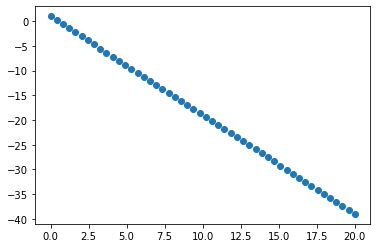

In [4]:
plt.scatter(x,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

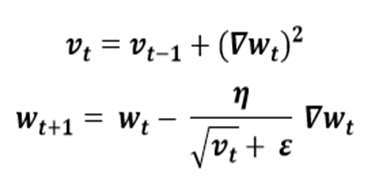

In [5]:
m=50
def Adagrad(x,y,alpha,epsilon,max_itetr):
    theta0 = 0
    theta1 = 0
    vt0 , vt1 = 0 , 0
    theta0_ls , theta1_ls , costs , h_x_ls = [] ,[] ,[] , []
    for i in range(max_itetr):
        h_x=theta0+theta1*x
        
        h_x_ls.append(h_x)
        theta0_ls.append(theta0)
        theta1_ls.append(theta1)
        
        costFunc=(1/(2*m))*(np.linalg.norm(h_x-y)**2)
        grad0 = (1/m)*(np.sum(h_x - y))
        grad1 = (1/m)*(np.sum((h_x - y)*x))
        
        vt0 = vt0 + grad0 ** 2
        vt1 = vt1 + grad1 ** 2
        
       
        
       
        if len(costs)>0 and abs(costFunc-costs[-1])<.001:
            break
        costs.append(costFunc)
        theta0 = theta0 - (alpha/(np.sqrt(vt0) + epsilon))*grad0 
        theta1 = theta1 - (alpha/(np.sqrt(vt1) + epsilon))*grad1
        
    return theta0,theta1,costs,theta0_ls,theta1_ls,h_x_ls
    
    

In [6]:
theta0_op,theta1_op,costs,theta0_l,theta1_l,predicts = Adagrad(x,y,0.018,2e-1,2000)

0.6805793419072623

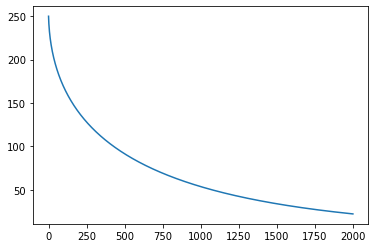

In [7]:
plt.plot(costs)
r2_score(y,predicts[-1])

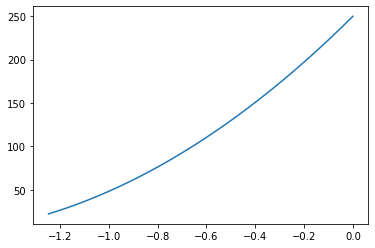

In [8]:
plt.plot(theta0_l,costs)

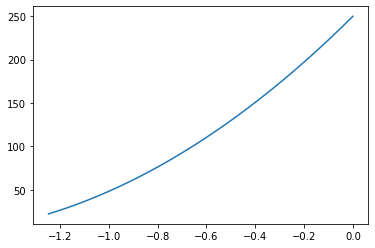

In [9]:
plt.plot(theta0_l,costs)

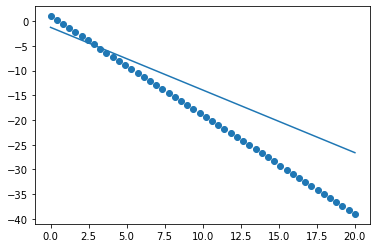

In [10]:
hx=theta0_l[-1]+theta1_l[-1]*x
plt.scatter(x,y)
plt.plot(x,hx)
plt.show()

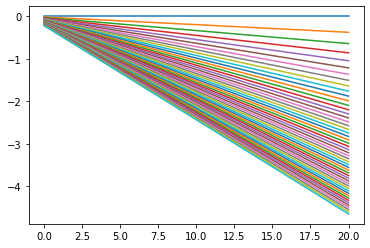

In [11]:
for i in range(x.shape[0]):
    H1 = theta0_l[i] + theta1_l[i] * x
    plt.plot(x,predicts[i])
plt.show()

In [12]:
theta0_op,theta1_op,costs,theta0_l,theta1_l,predicts = Adagrad(x,y,0.05,1e-7,1000)

0.9824472927041716

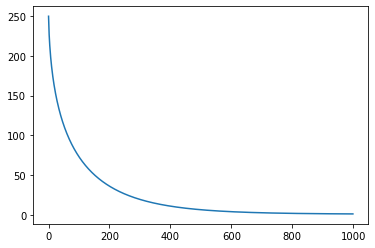

In [13]:
plt.plot(costs)
r2_score(y,predicts[-1])

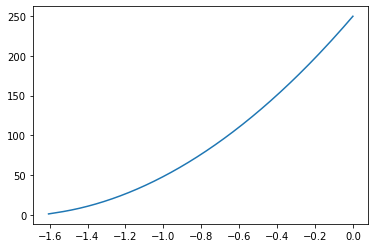

In [14]:
plt.plot(theta0_l,costs)

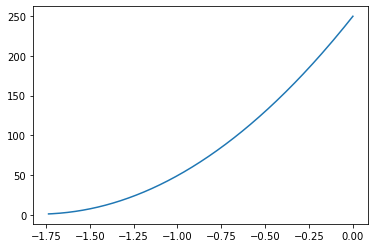

In [15]:
plt.plot(theta1_l,costs)

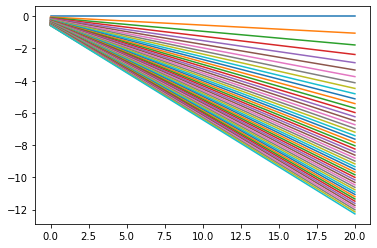

In [16]:
for i in range(x.shape[0]):
    H1 = theta0_l[i] + theta1_l[i] * x
    plt.plot(x,predicts[i])
plt.show()

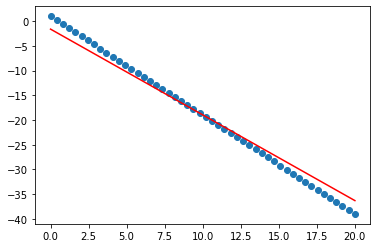

In [17]:
plt.scatter(x,y)
plt.plot(x,predicts[-1],'r')

## RMSProp

In [18]:
def RMSprop(x,y,alpha,m_iter,beta,epsilon):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    vt0 = 0
    vt1 = 0
    theta0_list = []
    theta1_list = []
    cost_array = [] 
    H = []
    for i in range(m_iter):
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        h = theta0+theta1*x
        H.append(h)
        j = (1/(2*m)) * (np.linalg.norm(h - y)**2)
        
        grad0 = (1/m)*(np.sum(h - y))
        grad1 = (1/m)*(np.sum((h - y)*x))
        
        vt0 = beta*vt0 +(1-beta)* grad0**2
        vt1 = beta*vt1 +(1-beta)* grad1**2

        theta0 = theta0 - (alpha/(np.sqrt(vt0) + epsilon))*grad0 
        theta1 = theta1 - (alpha/(np.sqrt(vt1) + epsilon))*grad1 
                       
        
        if len(cost_array)>0 and abs(j-cost_array[-1])<.001:
            break

        cost_array.append(j)
        
                       
    if len(cost_array)<len(theta0_l):
        theta0_list=theta0_list[0:len(cost_array)]
        theta1_list=theta0_list[0:len(cost_array)]
        
    return theta0,theta1,cost_array,theta0_list,theta1_list,H


In [19]:
theta0_RMS,theta1_RMS,costsRMS,theta0_l_RMS,theta1_l_RMS,predicts_RMS = RMSprop(x,y,0.02,100,0.5,1e-7)
r2_score(y,predicts_RMS[-1])

0.9446826761828054

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

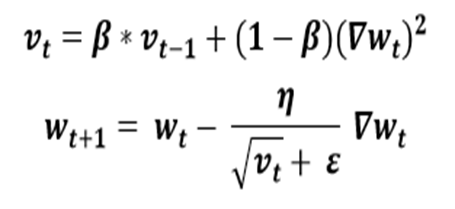

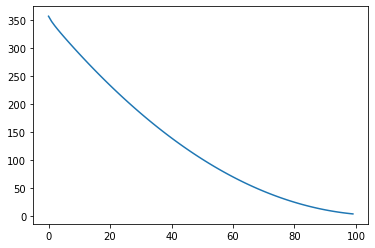

In [20]:
plt.plot(costsRMS)


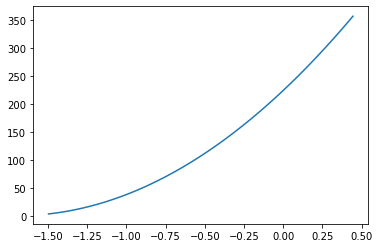

In [21]:
plt.plot(theta0_l_RMS,costsRMS)

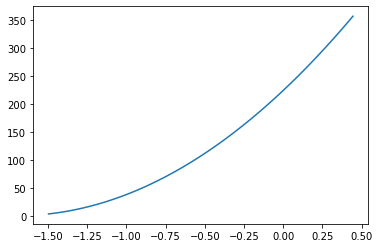

In [22]:
plt.plot(theta1_l_RMS,costsRMS)

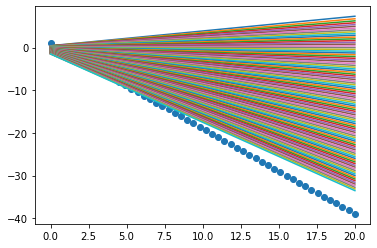

In [23]:
plt.scatter(x,y)
for i in range(100):
    plt.plot(x,predicts_RMS[i])
plt.show()

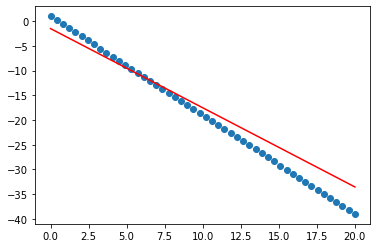

In [24]:
plt.scatter(x,y)
plt.plot(x,predicts_RMS[-1],'r')

In [25]:
theta0_RMS,theta1_RMS,costsRMS,theta0_l_RMS,theta1_l_RMS,predicts_RMS = RMSprop(x,y,0.03,1000,0.5,1e-7)
r2_score(y,predicts_RMS[-1])

0.999307049499283

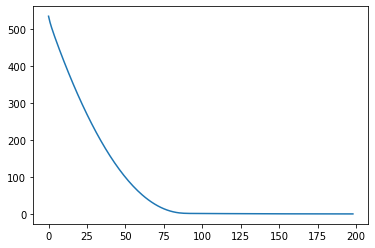

In [700]:
plt.plot(costsRMS)

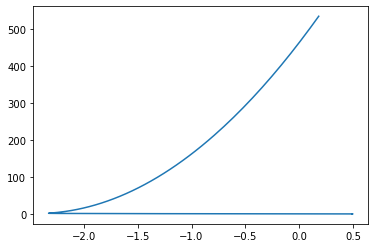

In [701]:
plt.plot(theta0_l_RMS,costsRMS)

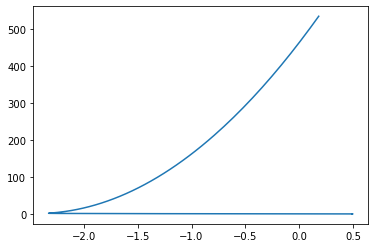

In [702]:
plt.plot(theta1_l_RMS,costsRMS)

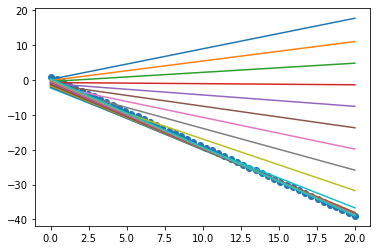

In [703]:
plt.scatter(x,y)
for i in range(0,len(predicts_RMS),10):
    plt.plot(x,predicts_RMS[i])
plt.show()

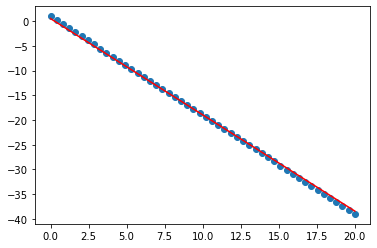

In [704]:
plt.scatter(x,y)
plt.plot(x,predicts_RMS[-1],'r')

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

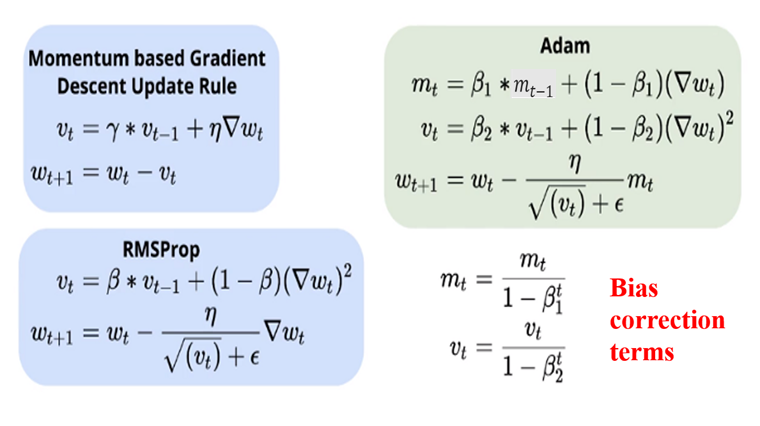

In [26]:
def Adam(x,y,alpha,m_iter,beta1,beta2,epsilon):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    vt0 = 0
    vt1 = 0
    mt0 = 0
    mt1 = 0
    theta0_list = []
    theta1_list = []
    cost_array = [] 
    H = []
    for i in range(1,m_iter+1):
        
      
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        h = theta0+theta1*x
        H.append(h)
        j = (1/(2*m)) * (np.linalg.norm(h - y)**2)
        
        
        grad0 = (1/m)*(np.sum(h - y))
        grad1 = (1/m)*(np.sum((h - y)*x))
        
        mt0 = beta1*mt0 +(1-beta1)* grad0
        mt1 = beta1*mt1 +(1-beta1)* grad1
        
        vt0 = beta2*vt0 +(1-beta2)* grad0**2
        vt1 = beta2*vt1 +(1-beta2)* grad1**2
        
        mt0 = mt0/(1-beta1**i)
        mt1 = mt1/(1-beta1**i)
        vt0 = vt0/(1-beta2**i)
        vt1 = vt1/(1-beta2**i)

        theta0 = theta0 - (alpha/(np.sqrt(vt0) + epsilon))*mt0 
        theta1 = theta1 - (alpha/(np.sqrt(vt1) + epsilon))*mt1 
                       
        if len(cost_array)>0 and abs(j-cost_array[-1])<.001:
            break

        cost_array.append(j)
        
        
        
        
    return theta0,theta1,cost_array,theta0_list,theta1_list,H


In [27]:
theta0_adam,theta1_adam,costs_adam,theta0_l_adam,theta1_l_adam,predicts_adam = Adam(x,y,0.002,1000,0.5,0.2,1e-4)

0.9902794035114059

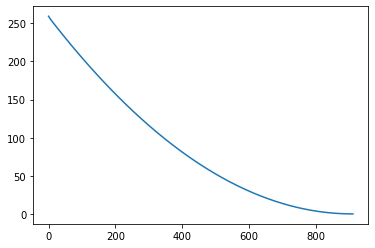

In [28]:
plt.plot(costs_adam)
r2_score(y,predicts_adam[-1])

ValueError: x and y must have same first dimension, but have shapes (912,) and (911,)

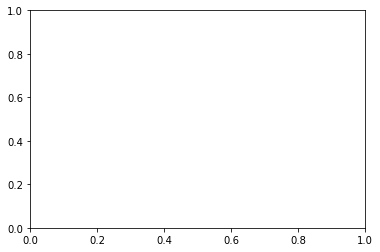

In [29]:
plt.plot(theta1_l_adam,costs_adam)

ValueError: x and y must have same first dimension, but have shapes (912,) and (911,)

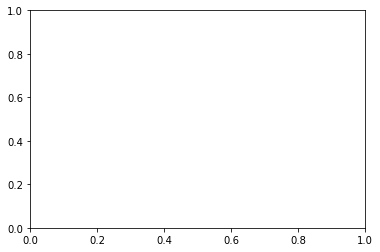

In [30]:
plt.plot(theta0_l_adam,costs_adam)

IndexError: list index out of range

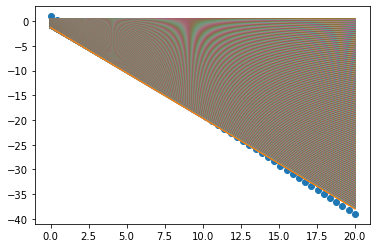

In [31]:
plt.scatter(x,y)
for i in range(1000):
    plt.plot(x,predicts_adam[i])
plt.show()

In [ ]:
plt.scatter(x,y)
plt.plot(x,predicts_adam[-1],'r')

In [ ]:
theta0_adam,theta1_adam,costs_adam,theta0_l_adam,theta1_l_adam,predicts_adam = Adam(x,y,0.004,1000,0.8,0.9,1e-6)
r2_score(y,predicts_adam[-1])

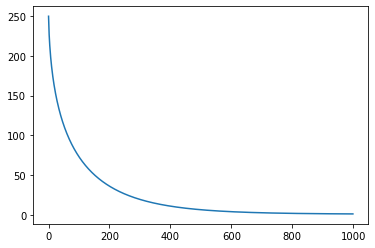

In [32]:
plt.plot(costs)

ValueError: x and y must have same first dimension, but have shapes (912,) and (911,)

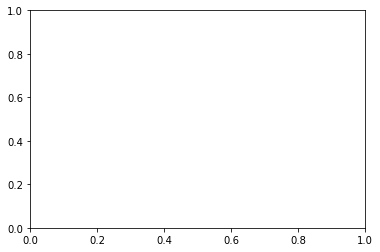

In [33]:
plt.plot(theta0_l_adam,costs_adam)

ValueError: x and y must have same first dimension, but have shapes (912,) and (911,)

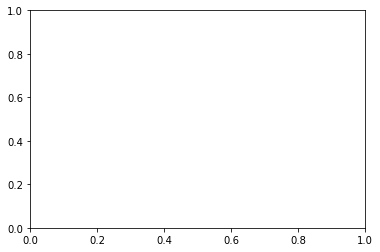

In [34]:
plt.plot(theta1_l_adam,costs_adam)

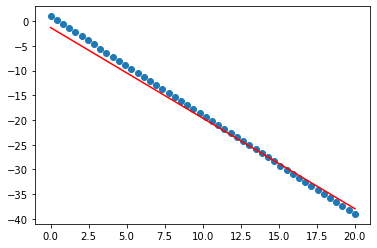

In [35]:
plt.scatter(x,y)
plt.plot(x,predicts_adam[-1],'r')

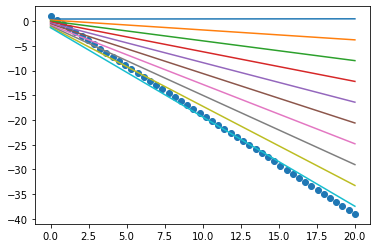

In [36]:
plt.scatter(x,y)
for i in range(0,1000,100):
    plt.plot(x,predicts_adam[i])
plt.show()

## Congratulations 
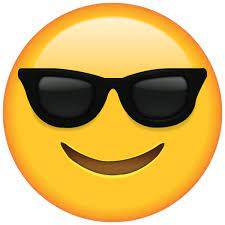

In [37]:
theta0_op,theta1_op,costs,theta0_l,theta1_l,predicts = Adagrad(x,y,0.05,1e-7,2000)

In [38]:
theta0_op_RMS,theta1_op_RMS,cost_l_RMS,theta0_l_RMS,theta1_l_RMS,H_l_RMS = RMSprop(x,y,0.05,2000,0.9,1e-7)

In [39]:
theta0_op_adam,theta1_op_adam,cost_l_adam,theta0_l_adam,theta1_l_adam,H_l_adam = Adam(x,y,0.05,2000,0.9,0.8,1e-7)

In [40]:
print("the Adagead accurecy :")
print(r2_score(y,predicts[-1]))
print("iterations =" ,len(predicts))

the Adagead accurecy :
0.9847644312591921
iterations = 1117


In [41]:
print("the RMS accurecy :")
print(r2_score(y,predicts_RMS[-1]))
print("iterations =" ,len(predicts_RMS))

the RMS accurecy :
0.999307049499283
iterations = 195


In [42]:
print("the Adam accurecy :")
print(r2_score(y,predicts_adam[-1]))
print("iterations =" ,len(predicts_adam))

the Adam accurecy :
0.9902794035114059
iterations = 912


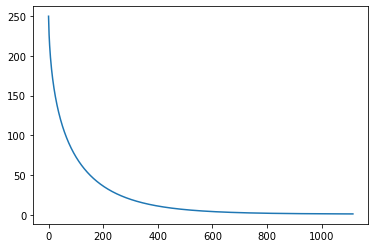

In [43]:
plt.plot(costs)

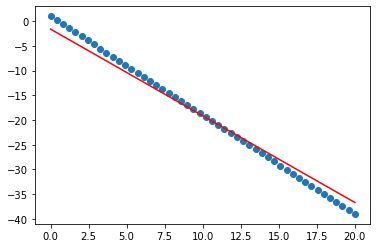

In [44]:
plt.scatter(x,y)
plt.plot(x,predicts[-1],'r')

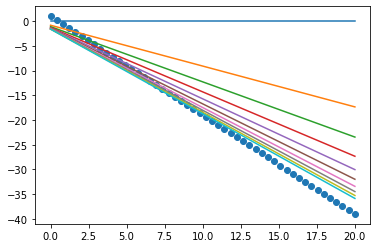

In [45]:
plt.scatter(x,y)
for i in range(0,1000,100):
    plt.plot(x,predicts[i])
plt.show()

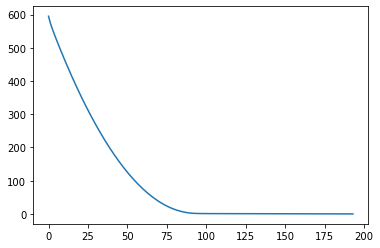

In [46]:
plt.plot(costsRMS)

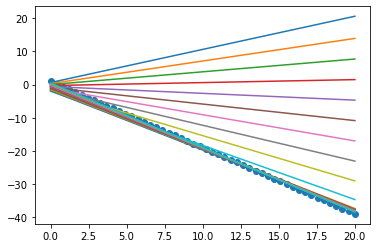

In [47]:
plt.scatter(x,y)
for i in range(0,len(predicts_RMS),10):
    plt.plot(x,predicts_RMS[i])
plt.show()

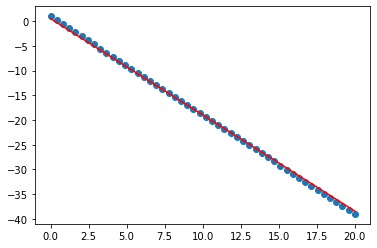

In [48]:
plt.scatter(x,y)
plt.plot(x,predicts_RMS[-1],'r')

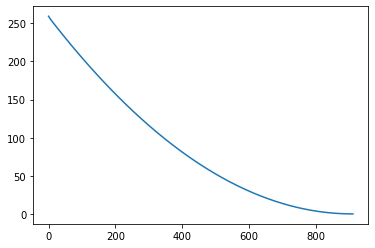

In [49]:
plt.plot(costs_adam)

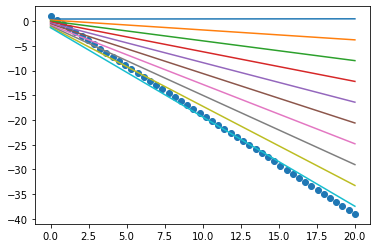

In [50]:
plt.scatter(x,y)
for i in range(0,len(predicts_adam),100):
    plt.plot(x,predicts_adam[i])
plt.show()

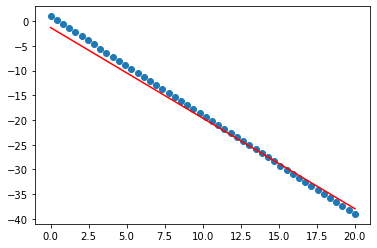

In [51]:
plt.scatter(x,y)
plt.plot(x,predicts_adam[-1],'r')